# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


/home/fanpeng/miniconda3/envs/tf2/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Questions

## 1. 
The TensorFlow Playground is a handy neural network simulator built by the
TensorFlow team. In this exercise, you will train several binary classifiers in just a
few clicks, and tweak the model’s architecture and its hyperparameters to gain
some intuition on how neural networks work and what their hyperparameters
do. Take some time to explore the following:

* a. The patterns learned by a neural net. Try training the default neural network
by clicking the Run button (top left). Notice how it quickly finds a good solu‐
tion for the classification task. The neurons in the first hidden layer have
learned simple patterns, while the neurons in the second hidden layer have
learned to combine the simple patterns of the first hidden layer into more
complex patterns. In general, the more layers there are, the more complex the
patterns can be.

* b. Activation functions. Try replacing the tanh activation function with a ReLU
activation function, and train the network again. Notice that it finds a solution
even faster, but this time the boundaries are linear. This is due to the shape of
the ReLU function.

* c. The risk of local minima. Modify the network architecture to have just one
hidden layer with three neurons. Train it multiple times (to reset the network
weights, click the Reset button next to the Play button). Notice that the train‐
ing time varies a lot, and sometimes it even gets stuck in a local minimum.

* d. What happens when neural nets are too small. Remove one neuron to keep
just two. Notice that the neural network is now incapable of finding a good
solution, even if you try multiple times. The model has too few parameters
and systematically underfits the training set.

* e. What happens when neural nets are large enough. Set the number of neurons
to eight, and train the network several times. Notice that it is now consistently
fast and never gets stuck. This highlights an important finding in neural net‐
work theory: large neural networks almost never get stuck in local minima,
and even when they do these local optima are almost as good as the global
optimum. However, they can still get stuck on long plateaus for a long time.

* f. The risk of vanishing gradients in deep networks. Select the spiral dataset (the
bottom-right dataset under “DATA”), and change the network architecture to
have four hidden layers with eight neurons each. Notice that training takes
much longer and often gets stuck on plateaus for long periods of time. Also
notice that the neurons in the highest layers (on the right) tend to evolve
faster than the neurons in the lowest layers (on the left). This problem, called
the “vanishing gradients” problem, can be alleviated with better weight initial‐
ization and other techniques, better optimizers (such as AdaGrad or Adam),
or Batch Normalization (discussed in Chapter 11).

* g. Go further. Take an hour or so to play around with other parameters and get a
feel for what they do, to build an intuitive understanding about neural
networks.

## 2. 
*Draw an ANN using the original artificial neurons (like the ones in Figure 10-3)
that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B =
(A ∧ ¬ B ∨ (¬ A ∧ B).*

## 3. 
*Why is it generally preferable to use a Logistic Regression classifier rather than a
classical Perceptron (i.e., a single layer of threshold logic units trained using the
Perceptron training algorithm)? How can you tweak a Perceptron to make it
equivalent to a Logistic Regression classifier?*


A classical Perceptron will converge only if the dataset is linearly separable, and it
won’t be able to estimate class probabilities. In contrast, a Logistic Regression
classifier will converge to a good solution even if the dataset is not linearly sepa‐
rable, and it will output class probabilities. If you change the Perceptron’s activa‐
tion function to the logistic activation function (or the softmax activation
function if there are multiple neurons), and if you train it using Gradient Descent
(or some other optimization algorithm minimizing the cost function, typically
cross entropy), then it becomes equivalent to a Logistic Regression classifier.

## 4. 
*Why was the logistic activation function a key ingredient in training the first
MLPs?*


The logistic activation function was a key ingredient in training the first MLPs
because its derivative is always nonzero, so Gradient Descent can always roll
down the slope. When the activation function is a step function, Gradient
Descent cannot move, as there is no slope at all.

## 5. 
*Name three popular activation functions. Can you draw them?*


Popular activation functions include the step function, the logistic (sigmoid)
function, the hyperbolic tangent (tanh) function, and the Rectified Linear Unit
(ReLU) function (see Figure 10-8). See Chapter 11 for other examples, such as
ELU and variants of the ReLU function.

## 6. 
*Suppose you have an MLP composed of one input layer with 10 passthrough
neurons, followed by one hidden layer with 50 artificial neurons, and finally one
output layer with 3 artificial neurons. All artificial neurons use the ReLU activa‐
tion function.*

- *What is the shape of the input matrix X?*

- *What are the shapes of the hidden layer’s weight vector Wh and its bias vector bh?*

- *What are the shapes of the output layer’s weight vector Wo and its bias vector bo?*

- *What is the shape of the network’s output matrix Y?*

- *Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo, and bo.*

The shape of the input matrix X is m × 10, where m represents the training batch size.

* a. The shape of the hidden layer’s weight vector Wh is 10 × 50, and the length of
its bias vector bh is 50.

* b. The shape of the output layer’s weight vector Wo is 50 × 3, and the length of its
bias vector bo is 3.

* c. The shape of the network’s output matrix Y is m × 3.

* d. Y* = ReLU(ReLU(X Wh + bh) Wo + bo). Recall that the ReLU function just sets
every negative number in the matrix to zero. Also note that when you are
adding a bias vector to a matrix, it is added to every single row in the matrix,
which is called broadcasting.

## 7. 
*How many neurons do you need in the output layer if you want to classify email
into spam or ham? What activation function should you use in the output layer?
If instead you want to tackle MNIST, how many neurons do you need in the out‐
put layer, and which activation function should you use? What about for getting
your network to predict housing prices, as in Chapter 2?*


To classify email into spam or ham, you just need one neuron in the output layer
of a neural network—for example, indicating the probability that the email is
spam. You would typically use the logistic activation function in the output layer
when estimating a probability. If instead you want to tackle MNIST, you need 10
neurons in the output layer, and you must replace the logistic function with the
softmax activation function, which can handle multiple classes, outputting one
probability per class. If you want your neural network to predict housing prices
like in Chapter 2, then you need one output neuron, using no activation function
at all in the output layer.3

## 8. 
*What is backpropagation and how does it work? What is the difference between
backpropagation and reverse-mode autodiff?*


Backpropagation is a technique used to train artificial neural networks. It first
computes the gradients of the cost function with regard to every model parame‐
ter (all the weights and biases), then it performs a Gradient Descent step using
these gradients. This backpropagation step is typically performed thousands or
millions of times, using many training batches, until the model parameters con‐
verge to values that (hopefully) minimize the cost function. To compute the gra‐
dients, backpropagation uses reverse-mode autodiff (although it wasn’t called
that when backpropagation was invented, and it has been reinvented several
times). Reverse-mode autodiff performs a forward pass through a computation
graph, computing every node’s value for the current training batch, and then it
performs a reverse pass, computing all the gradients at once (see Appendix D for
more details). So what’s the difference? Well, backpropagation refers to the whole
process of training an artificial neural network using multiple backpropagation
steps, each of which computes gradients and uses them to perform a Gradient
Descent step. In contrast, reverse-mode autodiff is just a technique to compute
gradients efficiently, and it happens to be used by backpropagation.

## 9. 
*Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP
overfits the training data, how could you tweak these hyperparameters to try to
solve the problem?*

Here is a list of all the hyperparameters you can tweak in a basic MLP: the num‐
ber of hidden layers, the number of neurons in each hidden layer, and the activa‐
tion function used in each hidden layer and in the output layer.4 In general, the
ReLU activation function (or one of its variants; see Chapter 11) is a good default
for the hidden layers. For the output layer, in general you will want the logistic
activation function for binary classification, the softmax activation function for
multiclass classification, or no activation function for regression.

## 10.
*Train a deep MLP on the MNIST dataset (you can load it using keras.data
sets.mnist.load_data(). See if you can get over 98% precision. Try searching
for the optimal learning rate by using the approach presented in this chapter (i.e.,
by growing the learning rate exponentially, plotting the loss, and finding the
point where the loss shoots up). Try adding all the bells and whistles—save
checkpoints, use early stopping, and plot learning curves using TensorBoard.*

In [2]:
from tensorflow import keras

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

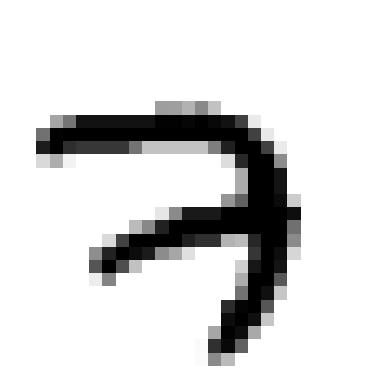

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

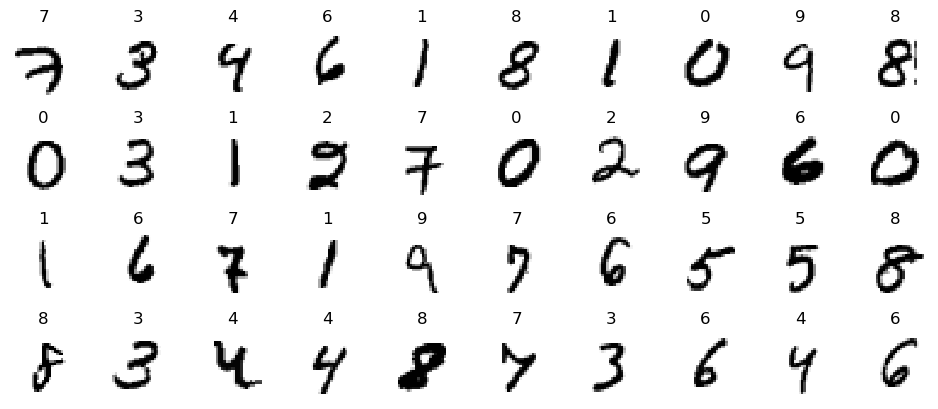

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [15]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax") 
])

2024-01-31 18:11:48.485975: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-31 18:11:48.541755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-31 18:11:48.542030: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-31 18:11:48.544552: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [19]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

2024-01-31 18:15:21.495387: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2024-01-31 18:15:21.738628: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 13s 6ms/step - loss: 4135042304.0000 - accuracy: 0.5659 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

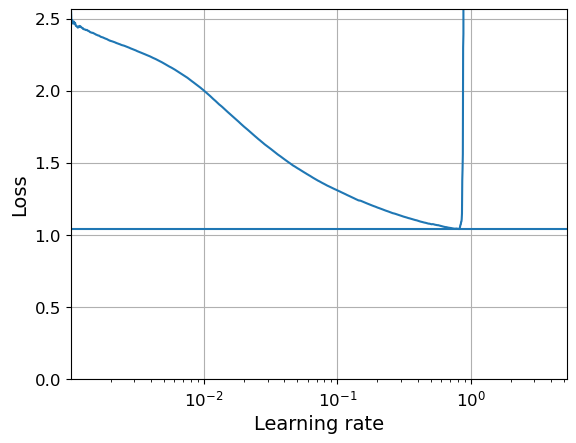

In [20]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [21]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [24]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100


2024-01-31 18:22:47.871075: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.
2024-01-31 18:22:48.031546: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 8s 5ms/step - loss: 0.2363 - accuracy: 0.9264 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 2/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0945 - accuracy: 0.9703 - val_loss: 0.0902 - val_accuracy: 0.9740
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0672 - accuracy: 0.9787 - val_loss: 0.0842 - val_accuracy: 0.9784
Epoch 4/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0471 - accuracy: 0.9847 - val_loss: 0.0792 - val_accuracy: 0.9786
Epoch 5/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0346 - accuracy: 0.9885 - val_loss: 0.0812 - val_accuracy: 0.9796
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0297 - accuracy: 0.9901 - val_loss: 0.0783 - val_accuracy: 0.9806
Epoch 7/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0770 - val_accuracy: 0

In [27]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0848 - accuracy: 0.9783


[0.08480130136013031, 0.9782999753952026]

In [29]:
%load_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006